# Fingerprint Enhancement

1. data load
2. segmenation
3. nomalize
4. estimate orientiaton
5. estimate frequency
6. enhancement with gaborfilter
7. bianrization

# Data Load

In [106]:
import os 
import glob
# import cv2
# import matplotlib as plt
# import matplotlib.pyplot as plt
import natsort
import numpy as np
import sys
import random
%matplotlib inline

In [107]:
lib_path = '.\\lib'
sys.path.insert(0,lib_path)

In [108]:
from lib.fingerprint_segmentation import *
from lib.utils import *
from lib.image_processing import *
from lib.fingerprint_inhancement_my import *

In [109]:
#Data path 
#gt path
gt_path= './data/SOCOFing/Real/'
gt_file_path=[gt_path+i for i in os.listdir(gt_path)]
gt_file_path = natsort.natsorted(gt_file_path)


#altered path
altered_path = "./data/socofing/SOCOFing/Altered/"
img_type = ["Altered-Easy","Altered-Medium","Altered-Hard"]
noise_type= ["CR", "Obl","Zcut"]
file_type = ['path','images']

altered_images_dict = {}
gt_images_dict = {}
gt_images = [cv2.imread(i,cv2.IMREAD_GRAYSCALE)[2:-4,2:-4] for i in gt_file_path] #socofing dataset의 의미없는 padding 삭제

for itype in img_type:
    altered_images_dict[itype] = {}
    for ntype in noise_type:
        altered_images_dict[itype][ntype] = {}
        img_path = os.path.join(altered_path, itype, '*_' + ntype + '.bmp')
        file_list = glob.glob(img_path)
        file_list = natsort.natsorted(file_list)
        imgs_list = [cv2.imread(i,cv2.IMREAD_GRAYSCALE)[2:-4,2:-4] for i in file_list]
        altered_images_dict[itype][ntype]['path'] = file_list
        altered_images_dict[itype][ntype]['images']= imgs_list


# for itype in img_type:
#     gt_images_dict[itype] = {}
#     for ntype in noise_type:
#         gt_images_dict[itype][ntype] = {'path':[],'images':[]}
#         for altered_path in altered_images_dict[itype][ntype]['path']:
#             gt_file_name = altered_path.split('/')[-1].replace("_"+ntype,"").split('\\')[-1]
#             gt_fpath = os.path.join(gt_path, gt_file_name)
#             img = cv2.imread(gt_fpath,cv2.IMREAD_GRAYSCALE)[2:-4,2:-4]
#             gt_images_dict[itype][ntype]['path'].append(gt_fpath)
#             gt_images_dict[itype][ntype]['images'].append(img)

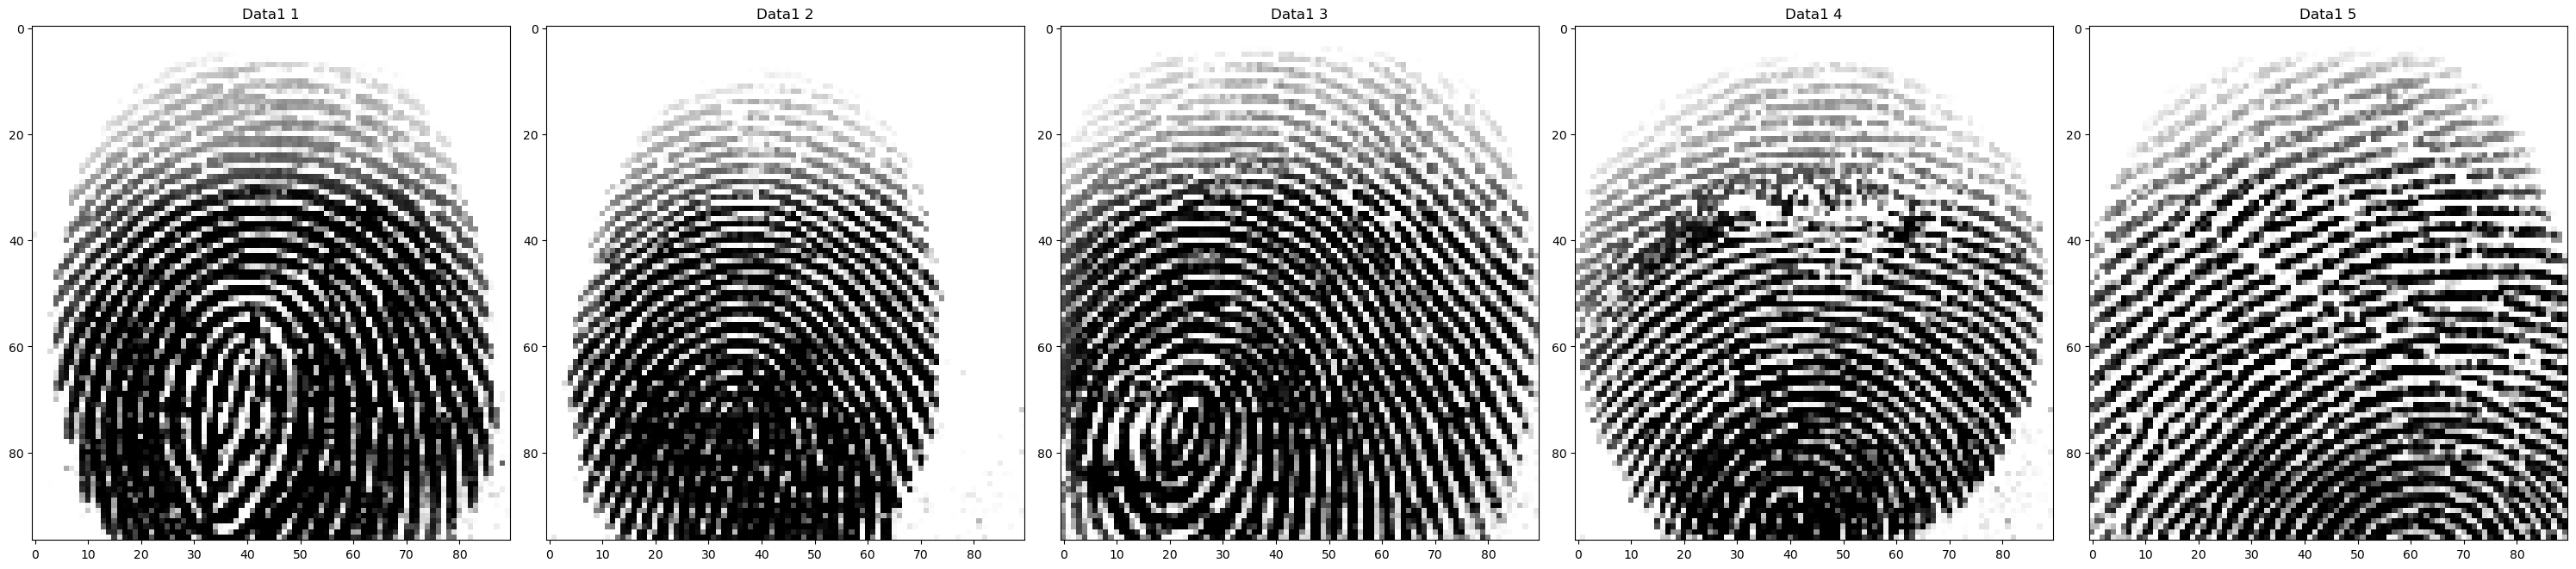

In [110]:

fig, axes = plt.subplots(1,5,figsize=(30,20))

for i, data in enumerate(gt_images[:5]):
    axes[i].imshow(data,cmap='gray')
    axes[i].set_title(f'Data1 {i+1}')

plt.tight_layout()
plt.show()

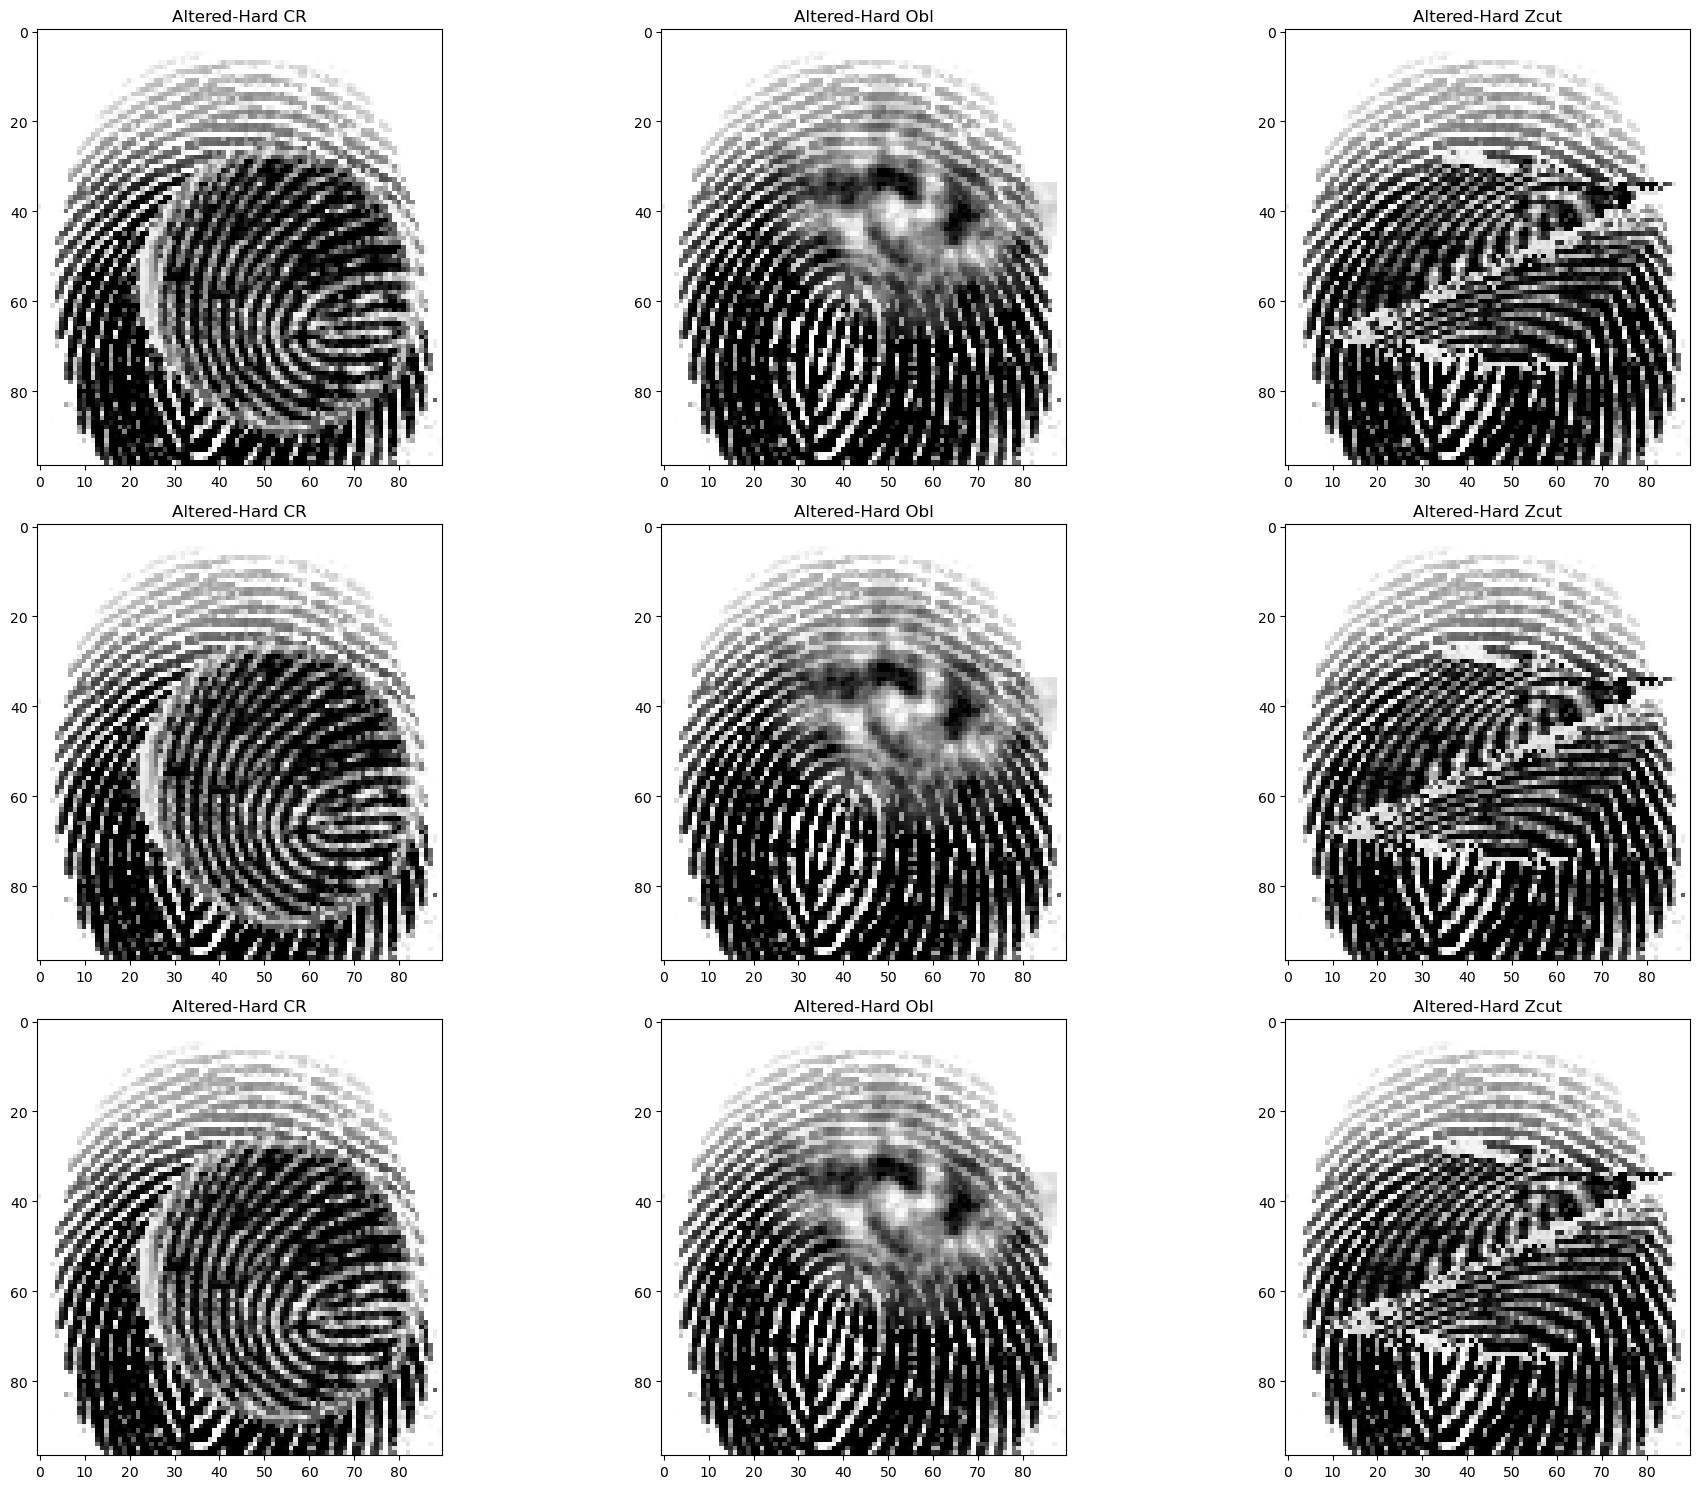

In [111]:

fig, axes = plt.subplots(3,3,figsize=(20,15))

for i,itpye in enumerate(img_type) : 
    for j,ntype in enumerate(noise_type)  :
        img = altered_images_dict[itype][ntype]['images'][0] 
        axes[i][j].imshow(img,cmap='gray')
        axes[i][j].set_title(itype+' '+ntype)

    

plt.tight_layout()

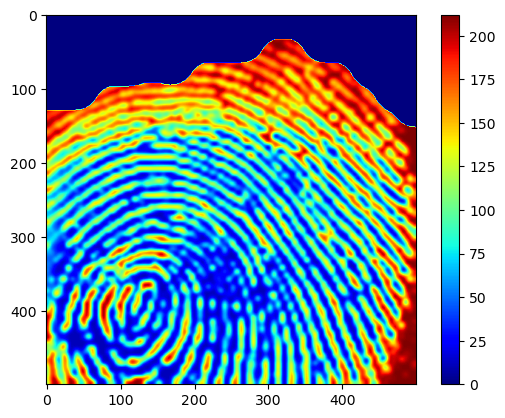

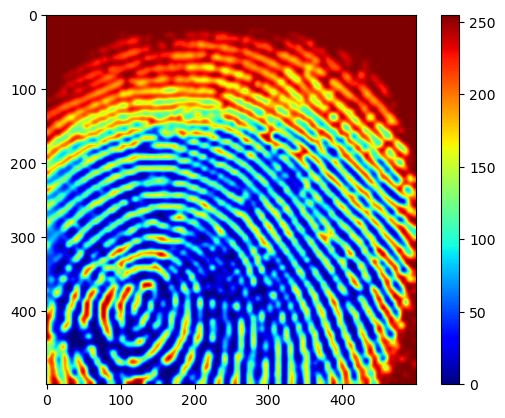

In [116]:
import matplotlib.pyplot as plt

# orientation field 이미지 출력
plt.imshow(norm_img, cmap='jet')
plt.colorbar()
plt.show()

plt.imshow(img, cmap='jet')
plt.colorbar()
plt.show()


In [112]:
# Resolution (500,500)
# for itype in img_type :
#     for ntype in noise_type :
#         resize_images((altered_images_dict[itype][ntype]['images']),(500,500))
 
gt_images = resize_images(gt_images,(500,500))


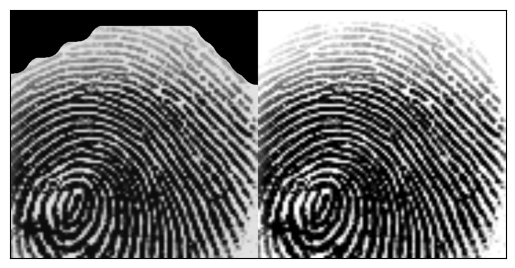

In [113]:


img = gt_images[2]
seg_img,mask = segmentation_maksed_thresholding(img,block=32)
norm_img = normalization_with_mask(seg_img,mask=mask)
display_image(np.hstack((norm_img,img)))

asdf
(500, 500)


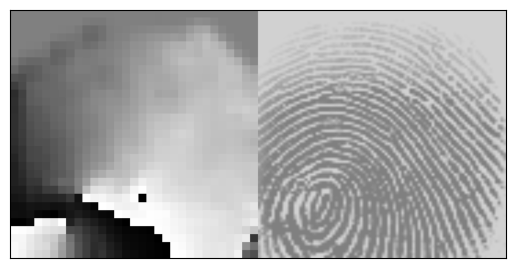

In [114]:
ori_img = estimate_orientation(norm_img)
print(ori_img.shape)
display_image(np.hstack((ori_img*255,img)))

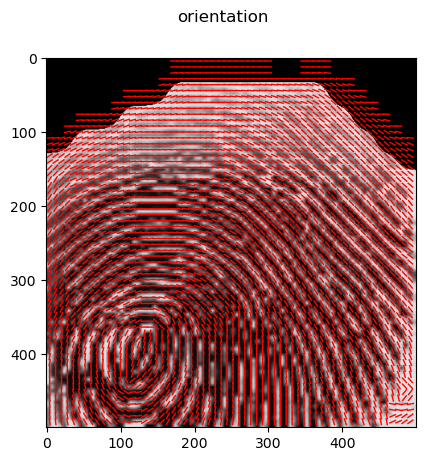

In [115]:
showOrientations(norm_img,ori_img,"orientation" ,8)

500 15 15
225
500 15 15


C:\Users\USER\AppData\Local\Temp\ipykernel_9976\4288781131.py:50: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  image = ndimage.interpolation.rotate(image, np.degrees(angle), reshape=False)


225


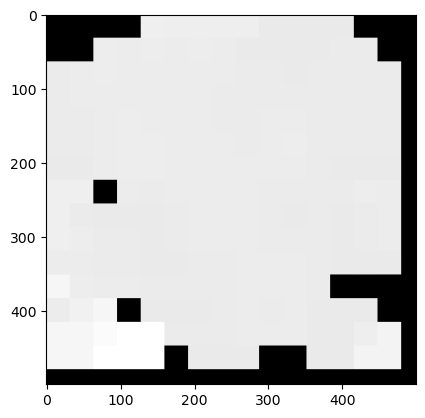

In [116]:

freq_img =estimateFrequencies(norm_img,ori_img,w=32)
plt.imshow(estimateFrequencies(norm_img,ori_img,w=32))

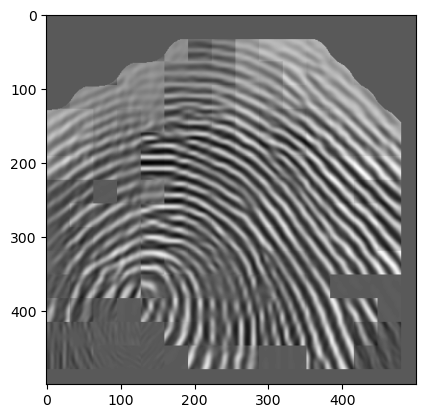

In [121]:


ehance_img= gaborFilter(img,ori_img,freq_img,w=32)
ehance_img = np.where(mask == 1.0, ehance_img,1.0)
plt.imshow(ehance_img)


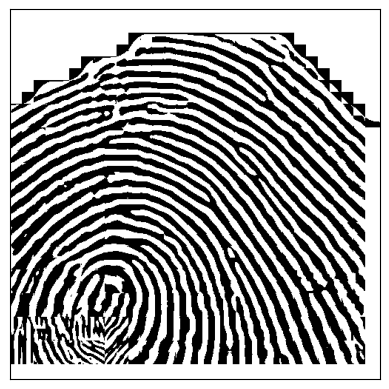

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [149]:
bi_img = binarize(ehance_img) 
display_image(bi_img)
print(bi_img)

전역 이진화는 별로 효과가 좋지 못하다. 지문을 찍을때의 압력때문에 지문 사이사이의 값들이 조금씩 차이가나서 망가지는듯 하여 지역이진화를 쓰면 좋겠다.
sauvola를 직접 구현하였으나 역시 c++로 구현된 skimage가 더 빠르다. 걍 만들어진거 있으면 있는거 쓰고, 구현할려면 C++로 해야할듯하다.

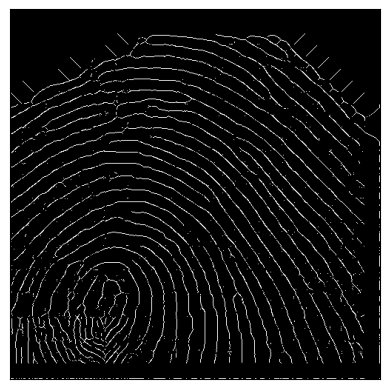

In [147]:
th_img = thinning_image(bi_img)
display_image(th_img)

#### Data Pipeline

In [ ]:
plt.imshow(easy_imgs_obl[0],cmap='gray')


### Feature Extraction


- cornerHarris를 이용한 특징점 검출 및 이미지 매칭 
- Cross Counter를 통한 특징점 검출 및 이미지 매칭
- 


In [ ]:
collect_count

In [ ]:
collect_count

In [ ]:
plt.imshow(thinning_gt_easy_cr[0])

In [ ]:

# Load the thinned fingerprint images
img1 =thinning_gt_easy_cr[0]

# Initialize the SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Find keypoints and descriptors for the first image
kp1, des1 = sift.detectAndCompute(img1, None)

# Set FLANN parameters
index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)

# Initialize FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Loop through the fingerprint images in the list
best_score = 0
best_match = None
for img in thinning_easy_imgs_cr[:100]:  # Assumes fingerprint2_thinned.png to fingerprint5_thinned.png exist
    img2 = img

    # Find keypoints and descriptors for the second image
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Match the descriptors using FLANN
    matches = flann.knnMatch(des1, des2, k=2)

    # Apply ratio test to select good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Calculate the score
    score = len(good_matches) / max(len(kp1), len(kp2)) * 100

    # Check if the current image is the best match so far
    if score > best_score:
        best_score = score
        best_match = img2

# Draw the best match and show the score
match_img = cv2.drawMatches(img1, kp1, best_match, kp2, good_matches, None)
plt.imshow(match_img)
plt.show()
print(f'Best match score: {best_score:.2f}%')
cv2.imshow('Best match', match_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

# Load the thinned fingerprint images
img1 = gt_thinnings[0]

# Initialize the SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Find keypoints and descriptors for the first image
kp1, des1 = sift.detectAndCompute(img1, None)

# Set FLANN parameters
index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)

# Initialize FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Loop through the fingerprint images in the list
best_score = 0
best_match = None
for img in easy_thinnings[:100]:  # Assumes fingerprint2_thinned.png to fingerprint5_thinned.png exist
    img2 = img

    # Find keypoints and descriptors for the second image
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Match the descriptors using FLANN
    matches = flann.knnMatch(des1, des2, k=2)

    # Apply ratio test to select good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Calculate the score
    score = len(good_matches) / max(len(kp1), len(kp2)) * 100

    # Check if the current image is the best match so far
    if score > best_score:
        best_score = score
        best_match = img2

# Draw the best match and show the score
plt.imshow(img1,)
match_img = cv2.drawMatches(img1, kp1, best_match, kp2, good_matches, None)
plt.imshow(match_img)
plt.show()
print(f'Best match score: {best_score:.2f}%')
cv2.imshow('Best match', match_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
minutiae_base = process_minutiae(gt_thinnings[0])
plot_minutiae(gt_thinnings[0], minutiae_base, size=8)

minutiae_test = process_minutiae(easy_thinnings[0])
plot_minutiae(easy_thinnings[0], minutiae_test, size=8)

In [ ]:
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


def extract_minutiae(image: np.array):
    """
    Crossing number technique for minutiae extraction from skeletonised binarised images 
    Based on http://airccse.org/journal/ijcseit/papers/2312ijcseit01.pdf
    Requires binarised image array with integer values in [0, 1]. Where 1 is ridge.
    Args:
        image (np.array): Image as a numpy array - 1 channel gray-scale, with white background
    Returns:
        list: [terminations, bifurcations] - extracted from the given image. 
                    terminations (list) - tuple coordinates for the location of a ridge termination
                    bifurcations (list) - tuple coordinates for the location of a ridge bifurcation
    """

    # Index order list - defines the order in which the pixels in a 3x3 frame are considered.
    idx = [(1, -1), (0, -1), (0, 1), (0, 0), (1, 0), (-1, 0), (-1, 1), (-1, -1), (1, -1)]

    debug = False

    height, width = image.shape

    # Store all minutiae
    bifurcations = []
    terminations = []

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # 3x3 frame extraction based on the previous, current and next values on x and y axis.
            frame = image[i - 1: i + 2, j - 1: j + 2]

            # Custom minutiae detection function.
            # Control for pixels found in the middle of the frame.
            # Once identified, it counts filled pixels separated by at least 1 empty pixel.
            pixel_list = [frame[idx[i]] * (1 - frame[idx[i + 1]]) for i in range(len(idx) - 1)]
            pixel_sum = frame[1, 1] * sum(pixel_list)

            # Based on http://airccse.org/journal/ijcseit/papers/2312ijcseit01.pdf
            # pixel_sum = .5 * sum([abs(frame[idx[i]] - frame[idx[i + 1]]) for i in range(len(indices) - 1)])

            if pixel_sum == 1:
                # Termination
                if debug:
                    # Displays a larger frame for debugging purposes.
                    print(f'Termination: {i}, {j}')
                    display_image(image[i - 2: i + 3, j - 2: j + 3])

                # Add termination coordinates
                terminations.append((i, j))

            elif pixel_sum == 3:
                # Bifurcation
                if debug:
                    # Displays a larger frame for debugging purposes.
                    print(f'Bifurcation: {i}, {j}')
                    display_image(image[i - 2: i + 3, j - 2: j + 3])

                # Add bifurcation coordinates
                bifurcations.append((i, j))

    return terminations, bifurcations


def clean_minutiae(image: np.array, minutiae: list) -> list:
    """
    Post-processing
    Remove minutiae identified on the outer terminations of the image.
    We identify outer minutiae as follows: For each type of minutia, we check its quadrant.
    If there are no other full pixels to both the closest sides to an edge on both x and y coord
    That minutiae is discraded.
    Checks location and other pixel values to the sides of the minutiae.
    Outputs list of cleaned minutiae.
    Args:
        image (np.array): Image to be analysed for cleaning borderline minutiae.
        minutiae  (list): Minutiae represented as a list of coordinate tuples (2d: x, y))
    Returns:
        list: Coordinate as tuple list of minutiae that are not found at the image bordering ridge terminations.
    """

    height, width = image.shape

    minutiae_clean = []
    for x, y in minutiae:
        # If there are directions in which the minutiae with x and y coordinates has only empty
        # pixels, that we label the minutiae as an image border and discard it.
        if (image[x, :y].sum() > 0) and (image[x, y + 1:].sum() > 0) and (image[:x, y].sum() > 0) and \
                (image[x + 1:, y].sum() > 0):
            minutiae_clean.append((x, y))

    return minutiae_clean


def extract_tuple_profile(distances: list, m: tuple, minutiae: list) -> list:
    """
    Explores tuple profile. A tuple is a set of minutiae that are found close together.
    Args:
        distances (np.array): Distances between a tuple and its neighbours. Should be used for computing the tuple profile.
        m            (tuple): The base minutiae from which the distances are computed.
        minutiae      (list): List of tuple-like coordinates for all minutiae.
    Returns:
        list: [ratios, angles] - A pair of all angles (list) and all ratios (list) identified for the given tuple.
    """

    # Closest minutiae to the current minutiae
    closest_distances = sorted(distances)[1:6]
    closest_indices = [list(distances).index(d) for d in closest_distances]
    closest_minutiae = [minutiae[i] for i in closest_indices]

    # Unique pair ratios.
    # The 10 pairs used for computing the ratios
    # i-i1 : i-i2, i-i1 : i-i3, i-i1 : i-i4, i-i1 : i-i5,
    # i-i2 : i-i3, i-i2 : i-i4, i-i2 : i-i5
    # i-i3 : i-i4, i-i3 : i-i5
    # i-i4 : i-i5
    unique_pairs = list(combinations(closest_distances, 2))
    # 2 decimal rounded ratios of max of the two distances divided by their minimum.
    compute_ratios = [round(max(p[0], p[1]) / min(p[0], p[1]), 2) for p in unique_pairs]

    # Angle computation.
    minutiae_combinations = list(combinations(closest_minutiae, 2))

    # Angle between the segments drawn from m to the two other minutae with varying distances.
    minutiae_angles = [round(extract_angle((m, x), (m, y)), 2) for x, y in minutiae_combinations]

    return [compute_ratios, minutiae_angles]


def process_minutiae(image: np.array):
    """
    Image processing into minutiae - bifurcations
    Args:
        image   (np.array): Image in 1 channel gray-scale.
    Returns:
        list:     minutiae list containing minutiae coordinates (x, y)
    """

    # Extract minutiae
    terminations, bifurcations = extract_minutiae(image)

    # Post-processing border minutiae removal.
    terminations = clean_minutiae(image, terminations)
    bifurcations = clean_minutiae(image, bifurcations)

    return terminations + bifurcations


def generate_tuple_profile(minutiae: list) -> dict:
    """
    Compute the distance matrix from each minutiae to the rest.
    Args:
        minutiae (list): List of coordinate tuples.
    Returns:
        dict: Tuple profile with all angles and ratios.
    """

    distance_matrix = np.array([[euclidian_distance(i, j) for i in minutiae] for j in minutiae])

    tuples = {}

    for i, m in enumerate(minutiae):
        # When comparing two tuple profiles, one from base and one from test image,
        # they are the same if at least 2 ratios match (and angles).

        # This means that for the tuple profile i is found in a second image under a
        # different tuple's profile.

        # Angles are given a +/- 3.5 degree range to match. To match sourcing device discrepancies.
        ratios_angles = extract_tuple_profile(distance_matrix[i], m, minutiae)
        tuples[m] = np.round(ratios_angles, 2)

    return tuples


def minutiae_points(image: np.array):
    """
    Minutiae as key points.
    """

    # ORB discretises the angle to increments of 2 * pi / 30 (12 degrees) and construct a lookup table of precomputed
    # BRIEF patterns. As long as the keypoint orientationis consistent across views, the correct set of points S
    # will be used to compute its descriptor.
    orb = cv2.ORB_create()

    # Use ORB to detect keypoints.
    points = orb.detect(image)

    # # Use minutiae extracted via crossing numbers technique as keypoints.
    # minutiae = process_minutiae(image)
    # points = [cv2.KeyPoint(y, x, 1) for (x, y) in minutiae]

    # Describe and compute descriptor extractor
    keypoints, descriptors = orb.compute(image, points)

    return keypoints, descriptors


def plot_minutiae_tree(image: np.array, points: list, size: int = 5, node_size: int = 20, graph_color: str = 'blue'):
    """
    Intakes a list of tuple-coordinates that should be linked together via an edge. Plots them on
    image    (np.array): Image array that should be plotted - 1 channel gray-scale
    size          (int): Size of the displayed figure. Square figure with side = size.
    points       (list): List of minutiae coordinates that should be chained together.
    node_size     (int): Graph node size if graph 'G' is given.
    graph_color   (str): Colour of the graph nodes and edges.
    """

    plt.figure(figsize=(size, size))
    plt.imshow(image)
    plt.grid(False)

    G = nx.Graph()

    # Create nodes for each coordinate pair
    for i, coord in enumerate(points):
        G.add_node(i, pos=(coord[1], coord[0]))

    # Create edges between subsequent nodes.
    G.add_edges_from([(i, i + 1) for i in range(len(points[:-1]))])

    nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=False, node_size=node_size, color=graph_color,
            edge_color=graph_color)

    plt.show()


def plot_minutiae(image: np.array, terminations: list = None, bifurcations: list = None, size: int = 5) -> None:
    """
    Plots minutiae as circles on the given image.
    Args:
        image    (np.array): Image array that should be plotted.
        terminations (list): Terminations that should be plotted. Each list element should contain a tuple with the
                                minutiae coordinates.
        bifurcations (list): Bifurcations that should be plotted. Each list element should contain a tuple with the
                                minutiae coordinates.
        size          (int): Size of the displayed figure. Square figure with side = size.
    """

    if bifurcations is None and terminations is None:
        raise Exception("INFO: No 'terminations' or 'bifurcations' parameter given. Nothing to plot.")
    else:
        fig = plt.figure(figsize=(size, size))
        plt.imshow(image,cmap='gray')
        plt.grid(False)

    if terminations is not None:
        print(terminations)
        print("INFO: Plotting terminations\' coordinates")
        for y, x in terminations:
            termination = plt.Circle((x, y), radius=5, linewidth=2, color='red', fill=False)
            fig.add_subplot(111).add_artist(termination)

    if bifurcations is not None:
        print(bifurcations)

        print("INFO: Plotting bifurcations\' coordinates")

        for y, x in bifurcations:
            bifurcation = plt.Circle((x, y), radius=5, linewidth=2,
                                     color='blue', fill=False)

            fig.add_subplot(111).add_artist(bifurcation)

In [ ]:
# Define function for crossing number algorithm
def crossing_number(img):
    cn_img = np.zeros_like(img)
    rows, cols = img.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if img[i, j] == 0:
                continue
            cn = 0
            if img[i-1, j] == 255:
                cn += 1
            if img[i-1, j+1] == 255:
                cn += 1
            if img[i, j+1] == 255:
                cn += 1
            if img[i+1, j+1] == 255:
                cn += 1
            if img[i+1, j] == 255:
                cn += 1
            if img[i+1, j-1] == 255:
                cn += 1
            if img[i, j-1] == 255:
                cn += 1
            if img[i-1, j-1] == 255:
                cn += 1
            if cn == 1:
                cn_img[i, j] = 255
            elif cn == 3:
                cn_img[i, j] = 128
            elif cn == 4:
                cn_img[i, j] = 64
    return cn_img

# Load fingerprint image
img_thin = gt_thinnings[0]

# Extract features using crossing number
cn_img = crossing_number(img_thin)

# Create color image for visualization
color_img = cv2.cvtColor(cn_img, cv2.COLOR_GRAY2BGR)
color_img[np.where(cn_img == 255)] = [0, 0, 255]   # Ending points (red)
color_img[np.where(cn_img == 128)] = [0, 255, 0]   # Bifurcation points (green)
color_img[np.where(cn_img == 64)] = [255, 0, 0]    # Cross points (blue)

test = cv2.cvtColor(img_thin,cv2.COLOR_GRAY2RGB)
plt.imshow(color_img)
plt.show()
plt.imshow(img_thin,cmap='gray')
plt.show()
combined_img = cv2.addWeighted(test, 0.1, color_img, 0.9, 0)

# color_img[np.where((color_img == [0, 0, 255]).all(axis=2))] = [0, 255, 0]

# Display result
plt.imshow(combined_img)
plt.show()
# Display result

In [ ]:

def get_counter_crossing_points(img: np.ndarray) -> list:
    """
    Counter Crossing 알고리즘을 사용하여 지문 이미지에서 특징점을 찾아 반환합니다.
    
    Args:
        img (numpy.ndarray): Thinning이 된 1채널(Gray) 지문 이미지.
    
    Returns:
        list: Counter Crossing 알고리즘을 통해 찾은 특징점 리스트.
    """
    # 커널 생성 (Counter Crossing을 위한)
    kernel = np.array([[1,1,1],[1,0,1],[1,1,1]], dtype=np.uint8)
    
    # Counter Crossing
    img_cc = cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel)
    
    # contour 찾기
    contours,_ = cv2.findContours(img_cc, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    # contour 중심점 찾기
    cc_points = []
    for contour in contours:
        moments = cv2.moments(contour)
        if moments["m00"] != 0:
            cx = int(moments["m10"] / moments["m00"])
            cy = int(moments["m01"] / moments["m00"])
            cc_points.append((cx, cy))
    
    return cc_points

def match_fingerprints(img1: np.ndarray, img2: np.ndarray) -> float:
    """
    두 개의 지문 이미지를 비교하여 일치율을 반환합니다.
    
    Args:
        img1 (numpy.ndarray): 1채널(Gray) 지문 이미지.
        img2 (numpy.ndarray): 1채널(Gray) 지문 이미지.
        
    Returns:
        float: 지문 이미지의 일치율.
    """
    
    # Counter Crossing
    cc_points1 = get_counter_crossing_points(img1)
    cc_points2 = get_counter_crossing_points(img2)
    
    # BFMatcher 객체 생성
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    
    # 매칭
    matches = bf.match(np.array(cc_points1), np.array(cc_points2))
    
    # 일치율 계산
    similarity = sum([match.distance for match in matches]) / len(matches)
    
    return similarity

In [ ]:
match_fingerprints(gt_images[0],altered_easy_images[0])

In [ ]:

def get_counter_crossing_points(img):
    img_cc = np.zeros_like(img)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            if img[i,j] == 0:
                continue
            p2 = img[i-1,j]
            p3 = img[i-1,j+1]
            p4 = img[i,j+1]
            p5 = img[i+1,j+1]
            p6 = img[i+1,j]
            p7 = img[i+1,j-1]
            p8 = img[i,j-1]
            p9 = img[i-1,j-1]
            C = (not p2 and (p3 or p4)) + (not p4 and (p5 or p6)) + \
                (not p6 and (p7 or p8)) + (not p8 and (p9 or p2))
            N1 = (p9 or p2) + (p3 or p4) + (p5 or p6) + (p7 or p8)
            N2 = (p2 or p3) + (p4 or p5) + (p6 or p7) + (p8 or p9)
            N = min(N1, N2)
            if C == 1 and (2 <= N <= 3):
                img_cc[i,j] = 255
    contours, _ = cv2.findContours(img_cc, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cc_points = []
    for contour in contours:
        moments = cv2.moments(contour)
        if moments["m00"] != 0:
            cx = int(moments["m10"] / moments["m00"])
            cy = int(moments["m01"] / moments["m00"])
            cc_points.append([cx, cy])
    return cc_points

# Load the images


# Apply Thinning
img1_thin = gt_thinnings[0]
img2_thin = easy_thinnings[0]

# Get Counter Crossing Points
cc_points1 = get_counter_crossing_points( gt_thinnings[0])
cc_points2 = get_counter_crossing_points(easy_thinnings[0])


print(cc_points1)
# Draw the Counter Crossing Points on the images
for point in cc_points1:
    cv2.circle(img1_thin, (point[0], point[1]), 3, (0, 0, 255), -1)
for point in cc_points2:
    cv2.circle(img2_thin, (point[0], point[1]), 3, (0, 0, 255), -1)

# Display the images
cv2.imshow("Image 1", img1_thin)
cv2.imshow("Image 2", img2_thin)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Detect keypoints using crossing number algorithm

def crossing_number(img):
    cn_img = np.zeros_like(img)
    rows, cols = img.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if img[i, j] == 0:
                continue
            cn = 0
            if img[i-1, j] == 255:
                cn += 1
            if img[i-1, j+1] == 255:
                cn += 1
            if img[i, j+1] == 255:
                cn += 1
            if img[i+1, j+1] == 255:
                cn += 1
            if img[i+1, j] == 255:
                cn += 1
            if img[i+1, j-1] == 255:
                cn += 1
            if img[i, j-1] == 255:
                cn += 1
            if img[i-1, j-1] == 255:
                cn += 1
            if cn == 1:
                cn_img[i, j] = 255
            elif cn == 3:
                cn_img[i, j] = 128
            elif cn == 4:
                cn_img[i, j] = 64
    return cn_img

def get_cn_des(img) : 
    cn_img = crossing_number(img)
    # Create SIFT object
    sift = cv2.xfeatures2d.SIFT_create()
    # Extract keypoints and descriptors
    kp = []
    cn_des=[]
    for i in range(8, cn_img.shape[0]-8):
        for j in range(8, cn_img.shape[1]-8):
            if cn_img[i,j] != 0:
                # Create keypoint
                kpt = cv2.KeyPoint(j, i, size=10)
                kp.append(kpt)
                # Calculate descriptor
                patch = cn_img[i-8:i+8, j-8:j+8]
                patch = cv2.resize(patch, (16, 16))
                descriptor = sift.compute(patch, [kpt])
                cn_des.append(descriptor[1])

    return kp, cn_des


# 확인하고 싶은 지문 이미지
query_img = gt_thinnigs[7]
#지문 이미지 feature extraction 및 get descripotr 
query_kp, query_des = get_cn_des(query_img)
query_des =np.concatenate(query_des,axis=0)
# Load descriptor list for comparison
descriptor_list = []
for img in easy_thinnings:
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des =get_cn_des(img)
    des = np.concatenate(des,axis=0)
    descriptor_list.append(des)


# Define distance metric for descriptor comparison
def distance_metric(descriptor1, descriptor2, metric_type='euclidean'):
    if metric_type == 'euclidean':
        return np.linalg.norm(descriptor1 - descriptor2)
    elif metric_type == 'manhattan':
        return np.sum(np.abs(descriptor1 - descriptor2))
    else:
        raise ValueError('Unsupported distance metric type')

# # Define query image descriptors
query_descriptors = query_des


# Match descriptors using Euclidean distance
distances = []
for i, descriptor in enumerate(descriptor_list): #디스크립터 리스트 i는 이미지 순서다.
    print(i)
    
    dist = distance_metric(descriptor, query_descriptors, metric_type='euclidean')
    distances.append((dist, i))

# Sort distances by ascending order
distances.sort(key=lambda x: x[0])

# Get the index of the image with the closest match
match_index = distances[0][1]

print(match_index)


# # Compare query image descriptors with descriptor lists of all comparison images
# best_match_index = -1
# best_match_distance = float('inf')
# for i, descriptor_list in enumerate(descriptor_lists):
#     for descriptor in descriptor_list:
#         distance = distance_metric(query_descriptors, descriptor)
#         if distance < best_match_distance:
#             best_match_index = i
#             best_match_distance = distance

# # Print best match index
# print('Best match index:', best_match_index)
# Compare query descriptor to all descriptors in the list
# bf = cv2.BFMatcher()
# matches = []
# for des in descriptor_list:
#     knn_matches = bf.knnMatch(query_des, des, k=2)
#     good_matches = []
#     for m,n in knn_matches:
#         if m.distance < 0.75*n.distance:
#             good_matches.append(m)
#     matches.append(len(good_matches))

# # Find index of image with the most matches
# best_match_idx = matches.index(max(matches))

# # Display the best matching image
# best_match_img = easy_thinnings[best_match_idx]
# plt.imshow(query_img,cmap='gray')
# plt.show()
# plt.imshow(best_match_img,cmap='gray')
# plt.show()
# # cv2.imshow('Best Match', best_match_img)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [ ]:
plt.imshow(easy_thinnings[4])
plt.show()

In [ ]:
# Find contours in the thinned image
contours, hierarchy = cv2.findContours(easy_imgs_cz[1], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# Create an empty array to store minutiae coordinates and types
minutiae = []

# Loop over the contours in the image
for cnt in contours:
    # Initialize empty arrays for bifurcation and ending points
    bif_points = []
    end_points = []

    # Loop over each point in the contour
    for i in range(cnt.shape[0]):
        # Get the current point
        pt = tuple(cnt[i][0])

        # Check if the current point is a bifurcation or ending point
        if img[pt[1], pt[0]] == 255:
            neighbors = img[pt[1]-1:pt[1]+2, pt[0]-1:pt[0]+2]
            count = np.count_nonzero(neighbors == 255)

            if count == 2:
                bif_points.append(pt)
            elif count == 1:
                end_points.append(pt)

                

    # Add the bifurcation and ending points to the minutiae array
    for pt in bif_points:
        minutiae.append({'coord': pt, 'type': 'bifurcation'})

    for pt in end_points:
        minutiae.append({'coord': pt, 'type': 'ending'})

print(minutiae)
# Visualize the minutiae on the original fingerprint image
img_orig = gt_thinnings[1]
for m in minutiae:
    if m['type'] == 'bifurcation':
        cv2.circle(img_orig, m['coord'], 5, (255), 2)
    else:
        cv2.circle(img_orig, m['coord'], 5, (0), 2)

cv2.imshow('Minutiae', img_orig)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 데이터 Write

In [ ]:
def otsu_binarization(img):
    src = img
    th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return dst

In [ ]:
sauvola_path ='E:/study_opencv/fingerprint/preprocess_img/sauvola'
otsu_file_path = 'E:/study_opencv/fingerprint/preprocess_img/otsu/'

In [ ]:
#gt_file_path = ''./data/SOCOFing/Real/100__M_Left_index_finger.BMP'
#altered_file_path './data/socofing/SOCOFing/Altered/Altered-Hard\\100__M_Left_index_finger_CR.BMP'

for gt, easy,medium,hard,gt_name,easy_name,medium_name,hard_name in zip(gt_images, altered_easy_images,altered_medium_images,altered_hard_images,gt_file_path,altered_easy_path,altered_medium_path,altered_hard_path) :
    cv2.imwrite(os.path.join(otsu_file_path,'gt',gt_name.split('/')[-1]),otsu_binarization(gt))
    cv2.imwrite(os.path.join(otsu_file_path,'easy',easy_name.split('\\')[-1]),otsu_binarization(easy))
    cv2.imwrite(os.path.join(otsu_file_path,'medium',easy_name.split('\\')[-1]),otsu_binarization(medium),)
    cv2.imwrite(os.path.join(otsu_file_path,'hard',easy_name.split('\\')[-1]),otsu_binarization(hard))




In [ ]:
for easy , easy_name in zip(altered_easy_images[6000:],altered_easy_path[6000:]) :
    cv2.imwrite(os.path.join(otsu_file_path,'easy',easy_name.split('\\')[-1]),otsu_binarization(easy))
    
for medium , medium_name in zip(altered_medium_images[6000:],altered_medium_path[6000:]) :
    cv2.imwrite(os.path.join(otsu_file_path,'medium',medium_name.split('\\')[-1]),otsu_binarization(medium))

for hard , hard_name in zip(altered_hard_images[6000:],altered_hard_path[6000:]) :
    cv2.imwrite(os.path.join(otsu_file_path,'hard',hard_name.split('\\')[-1]),otsu_binarization(hard))
       

In [ ]:


for gt, easy,medium,hard,gt_name,easy_name,medium_name,hard_name in zip(gt_images, altered_easy_images,altered_medium_images,altered_hard_images,gt_file_path,altered_easy_path,altered_medium_path,altered_hard_path) :
    cv2.imwrite(os.path.join(sauvola_path,'gt',gt_name.split('/')[-1]),sauvola_threshold(gt))
    cv2.imwrite(os.path.join(sauvola_path,'easy',easy_name.split('\\')[-1]),sauvola_threshold(easy))
    cv2.imwrite(os.path.join(sauvola_path,'medium',easy_name.split('\\')[-1]),sauvola_threshold(medium),)
    cv2.imwrite(os.path.join(sauvola_path,'hard',easy_name.split('\\')[-1]),sauvola_threshold(hard))

In [ ]:
for easy , easy_name in zip(altered_easy_images[6000:],altered_easy_path[6000:]) :
    cv2.imwrite(os.path.join(sauvola_path,'easy',easy_name.split('\\')[-1]),sauvola_threshold(easy))
    
for medium , medium_name in zip(altered_medium_images[6000:],altered_medium_path[6000:]) :
    cv2.imwrite(os.path.join(sauvola_path,'medium',medium_name.split('\\')[-1]),sauvola_threshold(medium))

for hard , hard_name in zip(altered_hard_images[6000:],altered_hard_path[6000:]) :
    cv2.imwrite(os.path.join(sauvola_path,'hard',hard_name.split('\\')[-1]),sauvola_threshold(hard))

#### Gui 생성

### 노이즈 제거


- median filtering
- Median filter : 지문 이미지에서 작은 노이즈를 제거하는 데 효과적입니다.
- 모폴리지 침식
- 가우시안
- deep-learning model 활용
밑에거는 시간나면 해보자
- Gabor filter : 지문 이미지에서 지문 라인을 강조하는 데 효과적입니다.

Wiener filter : 지문 이미지에서 가우시안 노이즈와 같은 선형 노이즈를 제거하는 데 효과적입니다.

Non-local means filter : 지문 이미지에서 일반적으로 발생하는 노이즈와 가우시안 노이즈를 제거하는 데 효과적입니다.

Morphological filtering : 지문 이미지에서 작은 노이즈를 제거하고 지문 라인을 보정하는 데 효과적입니다.

푸리에 변환(FFT) : 지문 이미지에서 주파수 도메인에서 노이즈를 분리하는 데 효과적입니다.
Median filter : 지문 이미지에서 작은 노이즈를 제거하는 데 효과적입니다.


[]


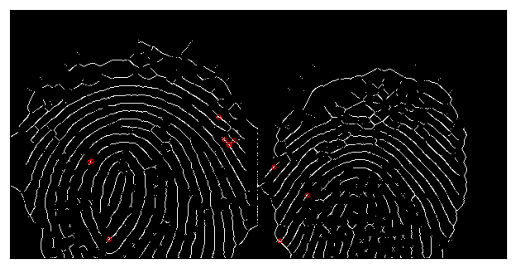

NameError: name 'img1' is not defined

In [208]:
def get_minutiae(img_thin):
    # Perform skeleton pruning to get branch points and ridge lines
    #img_prune = prune_skeleton(img_thin)
    img_thin = (img_thin * 255).astype(np.uint8)

    # Find ridge endings and bifurcations
    ridge_ends, bifurcations = get_minutiae_points(img_thin)

    return ridge_ends, bifurcations


def get_minutiae_points(img_prune):
    # Find ridge endings and bifurcations
    ridge_ends = []
    bifurcations = []
    for i in range(1, img_prune.shape[0]-1):
        for j in range(1, img_prune.shape[1]-1):
            if img_prune[i,j] == 1:
                # 3x3 주변확인을 한 이후 count가 1이면 끝점인지 분기점인지 확인을 함
                neigh = img_prune[i-1:i+2, j-1:j+2]
                count = np.sum(neigh) - 1
                
                if count == 1:
                    # ridge 끝점
                    ridge_ends.append((i,j))
                elif count == 3:
                    # Bifurcation 분기점
                    # 7x7 주변을 보고 1이 11개 이상이면 분기점
                    if np.sum(img_prune[i-2:i+3, j-2:j+3]) >= 9:
                        bifurcations.append((i,j))
    
    return ridge_ends, bifurcations

def match_minutiae(points1, points2, threshold=20):
    # Match minutiae between two images using Euclidean distance threshold
    match_pairs = []
    
    for i in range(len(points1)):
        p1 = points1[i]
        min_dist = float('inf')
        min_j = -1
        
        for j in range(len(points2)):
            p2 = points2[j]
            dist = np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
            
            if dist < min_dist:
                min_dist = dist
                min_j = j
        
        if min_dist < threshold:
            match_pairs.append((i, min_j))

        
    
    return match_pairs

def visualize_minutiae(img, points, color=(0, 0, 255)):
    # Visualize minutiae points on an image
    img_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for point in points:
        cv2.circle(img_vis, (point[1], point[0]), 3, 255)
    
    return img_vis
def visualize_matching(img1, points1, img2, points2, match_pairs):
    # Combine two images side by side
    h, w = img1.shape[:2]
    img_combined = np.zeros((h, w*2, 3), dtype=np.uint8)
    img_combined[:, :w] = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img_combined[:, w:] = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    # Draw lines between matched minutiae points
    for pair in match_pairs:
        
        p1 = points1[pair[0]]
        p2 = points2[pair[1]]
        p2 = (p2[0], p2[1]+w)  # shift x-coordinate of second point to the right
        cv2.line(img_combined, (p1[1], p1[0]), (p2[1], p2[0]), (0, 255, 0), 1)
    
    # Draw circles around minutiae points
    for point in points1:
        cv2.circle(img_combined, (point[1], point[0]), 3, (0, 0, 255))
    for point in points2:
        point = (point[0], point[1]+w)  # shift x-coordinate of points in second image
        cv2.circle(img_combined, (point[1], point[0]), 3, (0, 0, 255))

    return img_combined

# Load two fingerprint images
img1_thin = binaray_test_gt_set[0]
img2_thin = binaray_test_gt_set[1]

# print(easy_thinnings[1])
# img1m = get_minutiae(img1_thin)
# display_image(np.hstack((visualize_minutiae(img1_thin,img1m[0]),visualize_minutiae(img1_thin,img1m[1]))))
# #display_image(np.hstack((img, img_eq)))

# img1 = gt_thinnings[0]
# img2 = easy_thinnings[0]

# Extract minutiae points from both images
minutiae1 = get_minutiae(img1_thin)
minutiae2 = get_minutiae(img2_thin)

# Match minutiae points between the two images
matches = match_minutiae(minutiae1[1], minutiae2[1])

img1_vis = visualize_minutiae(img1_thin, minutiae1[1], color=(0, 0, 255))
img2_vis = visualize_minutiae(img2_thin, minutiae2[1], color=(0, 0, 255))
print(matches)
for match in matches:
    p1 = minutiae1[1][match[0]]
    p2 = minutiae2[1][match[1]]
    cv2.line(img1_vis, (p1[1], p1[0]), (p2[1], p2[0]), (0, 255, 0), 1)
    cv2.line(img2_vis, (p2[1], p2[0]), (p1[1], p1[0]), (0, 255, 0), 1)

display_image(np.hstack((img1_vis,img2_vis)))


plt.imshow(visualize_matching(img1,minutiae1[1],img2,minutiae2[1],matches))

In [ ]:

def crossing_number(img):
    h, w = img.shape
    cn_img = np.zeros((h, w), dtype=np.uint8)
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            if img[i, j] == 0:
                continue
            p2 = int(img[i-1, j])
            p3 = int(img[i-1, j+1])
            p4 = int(img[i, j+1])
            p5 = int(img[i+1, j+1])
            p6 = int(img[i+1, j])
            p7 = int(img[i+1, j-1])
            p8 = int(img[i, j-1])
            p9 = int(img[i-1, j-1])
            cn = (p2 == 0 and p3 == 1) + \
                 (p3 == 0 and p4 == 1) + \
                 (p4 == 0 and p5 == 1) + \
                 (p5 == 0 and p6 == 1) + \
                 (p6 == 0 and p7 == 1) + \
                 (p7 == 0 and p8 == 1) + \
                 (p8 == 0 and p9 == 1) + \
                 (p9 == 0 and p2 == 1)
    return cn_img

plt.imshow(crossing_number(gt_easy_cr[0]),cmap='gray')
test[0]

In [ ]:
neighbor = [(1,0), (1,-1), (0,-1), (-1,-1),
            (-1,0), (-1,1), (0,1), (1,1)]
def get_CN_points(img):
    h, w = img.shape
    CN_points_b = []
    CN_points_e = []
    for i in range(1, h-1):
        for j in range(1, w-1):
            if img[i,j] == 0:
                continue
            CN = 0
            # 8개의 픽셀을 검사하여 Crossing Number를 계산합니다.
            for k in range(8):
                x, y = i + neighbor[k][0], j + neighbor[k][1]
                if img[x,y] == 0:
                    CN += 1
            # Crossing Number가 1이면 끝점, 3이면 분기점으로 인식합니다.
            if CN == 1:
                CN_points_e.append((i,j))
            elif CN == 3:
                CN_points_b.append((i,j))
    return CN_points_e, CN_points_b

#thinning_test = fingerprint_pipeline(gt_easy_obl[:20])
km =thinning_test[12].astype(np.float32) / 255.0
b, e = get_CN_points(thinning_test[-1])
#b1,e1 = get_CN_points(test[2])


plt.imshow(visualize_minutiae(thinning_test[-1],b))

In [ ]:
import cv2
import numpy as np

def crossing_number(img, window_size):
    # Initialize an empty list to hold the minutiae points
    minutiae = []
    
    # Apply a threshold to the image to convert it to binary
    # _, img_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Iterate over each pixel in the image
    for i in range(window_size, img.shape[0]-window_size):
        for j in range(window_size, img.shape[1]-window_size):
            # Only consider white pixels
            if img[i,j] == 255:
                # Extract the local window around the pixel
                window = img[i-window_size:i+window_size+1, j-window_size:j+window_size+1]
                
                # Compute the crossing number of the window
                cn = 0
                for k in range(1, window.shape[0]-1):
                    for l in range(1, window.shape[1]-1):
                        p1 = window[k-1,l]
                        p2 = window[k+1,l]
                        p3 = window[k,l-1]
                        p4 = window[k,l+1]
                        if (p1 == 0 and p2 == 255) or (p1 == 255 and p2 == 0):
                            cn += 1
                        if (p3 == 0 and p4 == 255) or (p3 == 255 and p4 == 0):
                            cn += 1
                
                # If the crossing number is 1, the pixel is a ridge ending
                if cn == 1:
                    minutiae.append((j,i,1))
                # If the crossing number is 3, the pixel is a bifurcation
                elif cn == 3:
                    minutiae.append((j,i,3))
    
    # Return the list of minutiae points
    return minutiae

# Load the fingerprint image
img = test[3]


# Apply the crossing number algorithm to the image
minutiae = crossing_number(img, 50)
print(minutiae)
# Draw circles at the location of the minutiae points
for point in minutiae:
    x, y, t = point
    if t == 1:
        # Ridge ending
        color = (0, 0, 255)
        radius = 2
    elif t == 3:
        # Bifurcation
        color = (0, 255, 0)
        radius = 3
    cv2.circle(img, (x, y), radius, color, -1)

# Show the result
cv2.imshow('Minutiae Points', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
thinning_test = fingerprint_pipeline(gt_easy_obl[:20])

In [ ]:
img1 = gt_thinnings[0]
img2 = easy_thinnings[0]

sift = cv2.xfeatures2d.SIFT_create()
keypoints_cv2 = [cv2.KeyPoint(x, y, 3) for x, y in minutiae1[0]]
keypoints, descriptors = sift.compute(img1, keypoints_cv2)
keypoints_cv2 = [cv2.KeyPoint(x, y, 3) for x, y in minutiae2[0]]
keypoints2, descriptors2 = sift.compute(img2, keypoints_cv2)
def match_descriptors(descriptors1, descriptors2, threshold=0.7):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < threshold * n.distance:
            good_matches.append([m])
            
    return np.array(good_matches)

In [ ]:
match_descriptors(descriptors,descriptors2)

In [ ]:
def find_bifurcations(img):
    # Find bifurcations in the thinned image
    bifurcations = []
    img = (img * 255).astype(np.uint8)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if img[i, j] == 1:
                # Get the 3x3 neighborhood
                neighborhood = img[i-1:i+2, j-1:j+2]

                # Check if the current pixel is a bifurcation
                if np.sum(neighborhood) == 4:
                    # Find the two branches that meet at the bifurcation
                    rows, cols = np.where(neighborhood == 1)
                    branch1 = (rows[0], cols[0])
                    branch2 = (rows[1], cols[1])
                    bifurcations.append((i, j, branch1, branch2))

    return bifurcations

find_bifurcations(gt_thinnings[0])

# opencv interface를 활용하여 비교해보기 

# median filter
dst = cv2.medianBlur(src, 3) #meadian filtering 3x3
# gausian filter



In [ ]:

# gausian filter
# 이미지를 로드합니다.
img = cv2.imread('noisy_image.jpg')

# 가우시안 필터를 적용합니다.
img_filtered = cv2.GaussianBlur(img, (5, 5), 0)

# 결과 이미지를 출력합니다.
cv2.imshow('Filtered Image', img_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
import sys
from PySide6.QtWidgets import QApplication, QLabel

app = QApplication(sys.argv)
label = QLabel("Hello World!")
label.show()
app.exec()

In [32]:
import math

import numpy as np

import scipy
from scipy import ndimage, signal

import warnings
warnings.simplefilter("ignore")

import cv2
cv2.ocl.setUseOpenCL(False)

def enhance_image(image: np.array, block_orientation: int = 16, threshold: float = 0.1,
                  sigma_gradient: int = 1, sigma_block: int = 7, sigma_orientation: int = 7,
                  block_frequency: int = 38, window_size: int = 5, min_wave_length: int = 5,
                  max_wave_length: int = 15, padding: int = None, skeletonise: bool = True):
    """
    Image enhancement using gabor filters based on ridge orientation. 
    Adjusted from https: / / github.com / Utkarsh-Deshmukh / Fingerprint-Enhancement-Python
    Based on the paper: Hong, L., Wan, Y., and Jain, A. K. '
    Fingerprint image enhancement: Algorithm and performance evaluation'. 
    IEEE Transactions on Pattern Analysis and Machine Intelligence 20, 8 (1998), pp 777-789.
    License: BSD 2
    
    """

    # CLAHE adjusted image - histogram equalisation.
    img_clahe = apply_clahe(image)

    # Padding image for applying window frequency mask.
    if padding is not None:
        top, bottom, left, right = [padding] * 4
        img_clahe = cv2.copyMakeBorder(img_clahe, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)

    # Normalise images
    img_normalised, mask = ridge_segment(img_clahe, block_orientation, threshold)

    # Pixel orientation
    img_orientation = ridge_orient(img_normalised, sigma_gradient, sigma_block, sigma_orientation)

    # Ridge frequency
    img_frequency, med = ridge_frequency(img_normalised, mask, img_orientation, block_frequency, window_size,
                                         min_wave_length, max_wave_length)

    # Gabor filter
    image_filtered = ridge_filter(img_normalised, img_orientation, med * mask, .65, .65)

    image_enhanced = (image_filtered < -3)

    if skeletonise:
        # Applies image thinning and sets background to white.
        image_enhanced = thin_image(image_enhanced)
        image_enhanced = clean_points(image_enhanced)

    # Normalising image and processing background - and ridges.
    # image_enhanced = image_enhanced // image_enhanced.max()  # [0, 1] values

    # Invert colours if the background is dark.
    # image_enhanced = swap(image_enhanced) if image_enhanced.mean() < .5 else image_enhanced
    # image_enhanced = image_enhanced.astype('uint8')

    return image_enhanced.astype('uint8')


def ridge_orient(image: np.array, sigma_gradient: int, sigma_block: int, sigma_orientation: int):
    """
    Extracts the orientation of the ridges. 
    """

    # Image gradients.
    size = np.fix(6 * sigma_gradient)

    if np.remainder(size, 2) == 0:
        size = size + 1

    gauss = cv2.getGaussianKernel(np.int(size), sigma_gradient)

    # Gradient of Gaussian
    f = gauss * gauss.T
    fy, fx = np.gradient(f)

    Gx = signal.convolve2d(image, fx, mode='same')
    Gy = signal.convolve2d(image, fy, mode='same')

    Gxx = np.power(Gx, 2)
    Gyy = np.power(Gy, 2)
    Gxy = Gx * Gy

    # Smooth the covariance data to perform a weighted summation of the data.    

    size = np.fix(6 * sigma_block)

    gauss = cv2.getGaussianKernel(np.int(size), sigma_block)
    f = gauss * gauss.T

    Gxx = ndimage.convolve(Gxx, f)
    Gyy = ndimage.convolve(Gyy, f)
    Gxy = 2 * ndimage.convolve(Gxy, f)

    # Analytic solution of principal direction
    denom = np.sqrt(np.power(Gxy, 2) + np.power((Gxx - Gyy), 2)) + np.finfo(float).eps

    # Sine and cosine of doubled angles
    sin2theta = Gxy / denom
    cos2theta = (Gxx - Gyy) / denom

    if sigma_orientation:

        size = np.fix(6 * sigma_orientation)

        if np.remainder(size, 2) == 0:
            size = size + 1

        gauss = cv2.getGaussianKernel(np.int(size), sigma_orientation)

        f = gauss * gauss.T
        cos2theta = ndimage.convolve(cos2theta, f)  # Smoothed sine and cosine of
        sin2theta = ndimage.convolve(sin2theta, f)  # doubled angles

    img_orientation = np.pi / 2 + np.arctan2(sin2theta, cos2theta) / 2

    return img_orientation


def ridge_frequency(image: np.array, mask, orient: int, block_size: int, window_size: int, min_wave_length: int,
               max_wave_length: int) -> tuple:
    """
    Ridge frequency computation.
    """

    rows, cols = image.shape
    freq = np.zeros((rows, cols))

    for r in range(0, rows - block_size, block_size):
        for c in range(0, cols - block_size, block_size):
            block_image = image[r: r + block_size][:, c: c + block_size]
            block_orientation = orient[r: r + block_size][:, c: c + block_size]

            freq[r: r + block_size][:, c: c + block_size] = frequest(block_image, block_orientation, window_size,
                                                                     min_wave_length, max_wave_length)

    freq = freq * mask
    freq_1d = np.reshape(freq, (1, rows * cols))
    ind = np.where(freq_1d > 0)

    ind = np.array(ind)
    ind = ind[1, :]

    non_zero_elems_in_freq = freq_1d[0][ind]

    # median_freq = np.mean(non_zero_elems_in_freq)
    # TODO: (Dragos) Review
    median_freq = np.median(non_zero_elems_in_freq)

    return freq, median_freq


def ridge_filter(im, orient, freq, kx, ky):
    angleInc = 3
    im = np.double(im)
    rows, cols = im.shape
    newim = np.zeros((rows, cols))

    freq_1d = np.reshape(freq, (1, rows * cols))
    ind = np.where(freq_1d > 0)

    ind = np.array(ind)
    ind = ind[1, :]

    # Round the array of frequencies to the nearest 0.01 to reduce the
    # number of distinct frequencies we have to deal with.
    non_zero_elems_in_freq = freq_1d[0][ind]
    non_zero_elems_in_freq = np.double(np.round((non_zero_elems_in_freq * 100))) / 100

    unfreq = np.unique(non_zero_elems_in_freq)

    # Generate filters corresponding to these distinct frequencies and
    # orientations in 'angleInc' increments.

    sigmax = 1 / unfreq[0] * kx
    sigmay = 1 / unfreq[0] * ky

    sze = np.round(3 * np.max([sigmax, sigmay]))

    x, y = np.meshgrid(np.linspace(-sze, sze, (2 * sze + 1)), np.linspace(-sze, sze, (2 * sze + 1)))

    reffilter = np.exp(-((np.power(x, 2)) / (sigmax * sigmax) + (np.power(y, 2)) / (sigmay * sigmay))) * np.cos(
        2 * np.pi * unfreq[0] * x)  # this is the original gabor filter

    filt_rows, filt_cols = reffilter.shape

    gabor_filter = np.array(np.zeros((180 // angleInc, filt_rows, filt_cols)))

    for o in range(0, 180 // angleInc):
        # Generate rotated versions of the filter.  Note orientation
        # image provides orientation  * along *  the ridges, hence +90
        # degrees, and imrotate requires angles +ve anticlockwise, hence
        # the minus sign.        

        rot_filt = scipy.ndimage.rotate(reffilter, - (o * angleInc + 90), reshape=False)
        gabor_filter[o] = rot_filt

    # Find indices of matrix points greater than maxsze from the image
    # boundary

    maxsze = int(sze)

    temp = freq > 0
    validr, validc = np.where(temp)

    temp1 = validr > maxsze
    temp2 = validr < rows - maxsze
    temp3 = validc > maxsze
    temp4 = validc < cols - maxsze

    final_temp = temp1 & temp2 & temp3 & temp4

    finalind = np.where(final_temp)

    # Convert orientation matrix values from radians to an index value
    # that corresponds to round(degrees / angleInc)    

    maxorientindex = np.round(180 / angleInc)
    orientindex = np.round(orient / np.pi * 180 / angleInc)

    # do the filtering

    for i in range(0, rows):
        for j in range(0, cols):
            if orientindex[i][j] < 1:
                orientindex[i][j] = orientindex[i][j] + maxorientindex
            if orientindex[i][j] > maxorientindex:
                orientindex[i][j] = orientindex[i][j] - maxorientindex

    finalind_rows, finalind_cols = np.shape(finalind)

    sze = int(sze)
    for k in range(0, finalind_cols):
        r = validr[finalind[0][k]]
        c = validc[finalind[0][k]]

        img_block = im[r - sze:r + sze + 1][:, c - sze:c + sze + 1]

        newim[r][c] = np.sum(img_block * gabor_filter[int(orientindex[r][c]) - 1])

    return newim


def normalise(image: np.array):

    normed = (image - np.mean(image)) / (np.std(image))

    return normed


def ridge_segment(im, blksze, thresh):

    rows, cols = im.shape

    im = normalise(im)  # normalise to get zero mean and unit standard deviation

    new_rows = np.int(blksze * np.ceil((np.float(rows)) / (np.float(blksze))))
    new_cols = np.int(blksze * np.ceil((np.float(cols)) / (np.float(blksze))))

    padded_img = np.zeros((new_rows, new_cols))
    stddevim = np.zeros((new_rows, new_cols))

    padded_img[0:rows][:, 0:cols] = im

    for i in range(0, new_rows, blksze):
        for j in range(0, new_cols, blksze):
            block = padded_img[i:i + blksze][:, j:j + blksze]

            stddevim[i:i + blksze][:, j:j + blksze] = np.std(block) * np.ones(block.shape)

    stddevim = stddevim[0:rows][:, 0:cols]

    mask = stddevim > thresh

    mean_val = np.mean(im[mask])

    std_val = np.std(im[mask])

    normim = (im - mean_val) / (std_val)

    return normim, mask


def frequest(im, orientim, windsze, min_wave_length, max_wave_length):
    rows, cols = np.shape(im)

    # Find mean orientation within the block. This is done by averaging the
    # sines and cosines of the doubled angles before reconstructing the
    # angle again.  This avoids wraparound problems at the origin.
    cosorient = np.mean(np.cos(2 * orientim))
    sinorient = np.mean(np.sin(2 * orientim))
    orient = math.atan2(sinorient, cosorient) / 2

    # Rotate the image block so that the ridges are vertical    

    # ROT_mat = cv2.getRotationMatrix2D((cols / 2, rows / 2), orient / np.pi * 180 + 90, 1)
    # rotim = cv2.warpAffine(im, ROT_mat, (cols, rows))
    rotim = scipy.ndimage.rotate(im, orient / np.pi * 180 + 90, axes=(1, 0), reshape=False, order=3, mode='nearest')

    # Now crop the image so that the rotated image does not contain any
    # invalid regions.  This prevents the projection down the columns
    # from being mucked up.

    cropsze = int(np.fix(rows / np.sqrt(2)))
    offset = int(np.fix((rows - cropsze) / 2))
    rotim = rotim[offset:offset + cropsze][:, offset:offset + cropsze]

    # Sum down the columns to get a projection of the grey values down
    # the ridges.

    proj = np.sum(rotim, axis=0)
    dilation = scipy.ndimage.grey_dilation(proj, windsze, structure=np.ones(windsze))

    temp = np.abs(dilation - proj)

    peak_thresh = 2

    maxpts = (temp < peak_thresh) & (proj > np.mean(proj))
    maxind = np.where(maxpts)

    rows_maxind, cols_maxind = np.shape(maxind)

    # Determine the spatial frequency of the ridges by divinding the
    # distance between the 1st and last peaks by the (No of peaks-1). If no
    # peaks are detected, or the wavelength is outside the allowed bounds, 
    # the frequency image is set to 0    

    if cols_maxind < 2:
        freqim = np.zeros(im.shape)
    else:
        peaks = cols_maxind
        wave_length = (maxind[0][cols_maxind - 1] - maxind[0][0]) / (peaks - 1)
        if min_wave_length <= wave_length <= max_wave_length:
            freqim = 1 / np.double(wave_length) * np.ones(im.shape)
        else:
            freqim = np.zeros(im.shape)

    return freqim


def binarise_image(image: np.array, normalise: bool = True) -> np.array:
    """
    OTSU threshold based binarisation
    
    """

    _, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    if normalise:
        # Normalize to 0 and 1 range
        image[image == 255] = 1

    return image


def apply_clahe(image: np.array, clip_limit: float = 2.0, tile_grid_size: tuple = (8, 8)):
    """
    Contrast Limited Adaptive Histogram Equalization
    
    """

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    return clahe.apply(image)


def fourier_transform(image: np.array) -> np.array:
    """
    2D Fourier transform image enhancement implementation.
    32x32 pixel windows processed at a time.
    np implementation of FFT for computing DFT
    
    """

    f = np.fft.fft2(image)
    
    return np.fft.fftshift(f)


def high_pass_filter(image: np.array) -> np.array:
    """
    HPF implementation
    
    """

    shifted = fourier_transform(image)
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    shifted[crow - 30: crow + 30, ccol - 30: ccol + 30] = 0
    f_ishift = np.fft.ifftshift(shifted)
    
    return np.abs(np.fft.ifft2(f_ishift))

In [ ]:
import numpy as np

from skimage.morphology import skeletonize


def clean_points(image: np.array, filter_size: int = 6):
    """
    Remove debris from the image - 1x1 filled pixel areas.
    Args:
        image  (np.array): Image array 1 channel, gray-scale.
        filter_size (int): Size of the rolling window applied for cleaning the array.
    """

    # Normalise
    template_base = image.copy() / image.max()
    
    template_new = template_base.copy()
    
    # Layer - window size.
    height, width = image.shape
    
    for i in range(height - filter_size):
        for j in range(width - filter_size):
            
            layer_filter = template_new[i:i + filter_size, j:j + filter_size]
            
            flag = 0
            if sum(layer_filter[:, 0]) == 0:
                flag += 1
            if sum(layer_filter[:, filter_size - 1]) == 0:
                flag += 1
            if sum(layer_filter[0, :]) == 0:
                flag += 1
            if sum(layer_filter[filter_size - 1, :]) == 0:
                flag += 1
            if flag > 3:
                template_base[i: i + filter_size, j: j + filter_size] = np.zeros((filter_size, filter_size))

    return template_base


def thin_image(image: np.array, swap_image: bool = False) -> np.array:
    """
    Thins given image. 
    
    Args:
        image  (np.array): Image as a numpy array, 1 channel, gray scale.
        swap_image (bool): Swaps background colour with ridge colour
    
    Returns:
        np.array: Thinned image.
    """
    
    # Process image - thinning, cleaning and normalisation
    img_skel = skeletonize(image / image.max()).astype(int)

    # Clean noise or impurities (1x1 filled pixels)
    img_skel = clean_points(img_skel).astype(int)
    
    if swap_image:
        return swap(img_skel)
    else:
        return img_skel


def swap(image: np.array) -> np.array:
    """
    Number swap in np array. Value mirroring.
    Args:
        image (np.array): Image that should be transformed.
    Returns:
        np.array: Transformed image (array)
    """

    image_inverted = np.invert(image)
    
    return image_inverted // image_inverted.max()


def occurrences(image: np.array, max_range: int = 255) -> np.array:
    """
    Probability of occurrence of gray levels in the grayscale image. 
    
    """

    value_distribution = [np.count_nonzero(image == i) for i in range(max_range + 1)]

    return np.array([v / image.size for v in value_distribution])


def cdf(image: np.array) -> np.array:
    """
    Compute np array cdf. 
    
    """

    return np.cumsum(occurrences(image))


def histogram_equalisation(image: np.array) -> np.array:
    """
    Uniformly distributed grayscale data as numpy array. 
    
    """

    mapping = cdf(image) * (occurrences(image) > 0).astype(int)
    scaled_data = mapping * 255

    return np.array([[scaled_data[i] for i in j] for j in image])


def cdf_normalised(image: np.array, max_range: int = 255) -> np.array:
    """
    Normalosed CDF
    """

    hist_data, bins = np.histogram(image.flatten(), max_range, [0, max_range])
    cdf_values = hist_data.cumsum()
    
    return cdf_values * hist_data.max() / cdf_values.max()


def binarise(image: np.ndarray, window_size: int = 8, threshold: int = None, delta: float = .95) -> np.ndarray:
    """    
    Binarise image data - implemented either with or without ridge thinning.
    This function unses a rolling-window of given side size for separating
    the white background from the black ridges based on a threshold or the mean of each frame.
    
    Args:
        image (numpy.ndarray): 1-channel (gray) 2D array storing pixel colour levels.
        window_size     (int): Length of the rolling window's sides. Default: 8
        threshold       (int): Threshold for binarising the values (0 and 255). 
                               If None, it uses the mean value of the frame. Default: None
        delta         (float): Change parameter. Default: .95
    
    Returns:
        Binarised image as a numpy.ndarray
    
    """
    
    # Image dimensions (300x300 as per assignment specifications)
    height = image.shape[0]
    width = image.shape[1]
    
    # Template used to transform the given image. 
    template = image.copy()
        
    for i in range(0, height - window_size + 1, window_size):
        for j in range(0, width - window_size + 1, window_size):
            # Rolling window array and mean of window-contained values.
            window = template[i: i + window_size, j: j + window_size]
            threshold_val = window.mean() if threshold is None else threshold
            
            # Pixel iteration within the window.
            for p in range(0, window.size):
                
                if window[p // window_size][p % window_size] < threshold_val * delta:
                    template[i + p // window_size][j + p % window_size] = 0
                elif window[p // window_size][p % window_size] >= threshold_val * delta:
                    template[i + p // window_size][j + p % window_size] = 255

    # Store as integer to save memory.
    template = template.astype("uint8")
    
    return template

In [ ]:
#basic 

def display_image(image: np.array, title: str = None, cmap: str = None, figsize: tuple = None):
    """
    Plots an image using matplotlib pyplot imshow.
    Args:
        image (nd.array): Image that should be visualised.
        title      (str): Displayed graph title.
        cmap       (str): Cmap type.
        figsize  (tuple): Size of the displayed figure. 
    """

    if figsize:
        plt.figure(figsize=figsize)

    plt.imshow(image, cmap=cmap)

    if (len(image.shape) == 2) or (image.shape[-1] == 1):
        plt.gray()

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

def extract_angle(a: list, b: list) -> float:
    """
    Extract angle between two vectors with endpoints defined by two tuples.
    Args:
        a            (list): First segment that contains a starting coordinate (x, y) and an ending coordinate (x, y)
        b            (list): Second segment that contains a starting coordinate (x, y) and an ending coordinate (x, y)
        centre_angle (bool): True - free angle, False - constrained in the range [0, 180]
    Returns:
        float: Angle between the two segments.
    """

    # Vector form
    a_vec = [(a[0][0] - a[1][0]), (a[0][1] - a[1][1])]
    b_vec = [(b[0][0] - b[1][0]), (b[0][1] - b[1][1])]

    ab_dot = np.dot(a_vec, b_vec)
    a_mag = np.dot(a_vec, a_vec) ** 0.5
    b_mag = np.dot(b_vec, b_vec) ** 0.5

    # Radian angle to degrees
    angle = math.acos(round(ab_dot / b_mag / a_mag, 6))

    angle_degrees = math.degrees(angle) % 360

    if angle_degrees - 180 >= 0:
        return 360 - angle_degrees
    else:
        return angle_degrees
    
def euclidian_distance(m1: tuple, m2: tuple) -> float:
    """
    Distance between 2 points based on their 2D coordinates
    Args:
        m1 (tuple): Coordinates (x, y) used as the first distance measurement point.
        m2 (tuple): Coordinates (x, y) used as the second distance measurement point.
    Returns:
        int: Distance between the two coordinates using euclidian distance (Pythagorean theorem)
    """

    return distance.euclidean(m1, m2) 

위 코드에서 cv2.imread() 함수를 사용하여 이미지를 로드하고, cv2.GaussianBlur() 함수를 사용하여 가우시안 필터를 적용합니다. cv2.GaussianBlur() 함수는 필터 크기를 지정할 수 있는 ksize 매개변수와, 가우시안 분포의 표준편차를 지정할 수 있는 sigmaX 매개변수를 사용합니다.

위 코드에서는 필터 크기를 (5, 5)로 지정하고, sigmaX 값을 0으로 지정하여 기본값을 사용하였습니다. 필터 크기를 늘리면 잡음 제거 효과가 더욱 커질 수 있지만, 이미지 선명도가 떨어지는 단점이 있으므로 적절한 필터 크기를 선택하는 것이 중요합니다.

결과 이미지는 cv2.imshow() 함수를 사용하여 출력할 수 있습니다. cv2.waitKey() 함수는 사용자가 키보드 입력을 기다리도록 합니다. 마지막으로, cv2.destroyAllWindows() 함수를 사용하여 모든 창을 닫습니다.

### Edge 검출
- sobel
- canny
Canny Edge Detection
이미지에서 Edge를 검출하는 가장 대표적인 방법 중 하나입니다. 다양한 잡음에도 민감하게 반응하며, 불필요한 Edge를 제거하여 선명한 Edge를 추출할 수 있습니다.
Sobel Operator
이미지에서 Gradient를 계산하여 Edge를 검출하는 방법입니다. 미분 연산을 이용하여 이미지에서 불연속성이 있는 부분을 검출할 수 있습니다.
Laplacian of Gaussian (LoG)
이미지를 Gaussian 필터링한 후, Laplacian을 적용하여 Edge를 검출하는 방법입니다. Gaussian 필터링으로 이미지에서 노이즈를 제거한 후 Laplacian 필터를 적용하므로, 민감한 Edge 검출이 가능합니다.
Marr-Hildreth Algorithm
LoG 방법을 보완한 알고리즘입니다. 이미지를 Gaussian 필터링하여 Laplacian을 적용한 뒤, Zero Crossing을 검출하여 Edge를 추출합니다. 노이즈 제거와 선명한 Edge 검출에 용이합니다.

### Feature Extraction

지문 데이터의 특징점 검출에는 다양한 알고리즘이 있지만, 대표적으로 많이 사용되는 것은 다음과 같은 알고리즘들이 있습니다.

Harris Corner Detection
Harris Corner Detection은 지문 데이터의 특징점 검출을 위해 처음으로 제안된 알고리즘 중 하나입니다. 이 알고리즘은 특정 픽셀 주변의 작은 이동에도 인식이 가능한 특징점을 검출하기 위해 개발되었습니다. Harris Corner Detection은 픽셀들이 서로 다른 방향에서 변화하는 정도를 계산하여, 해당 지점이 코너인지 아닌지를 판단하는 방법입니다.
SIFT (Scale-Invariant Feature Transform)
SIFT 알고리즘은 이미지의 크기나 회전 등의 변화에 대해 불변성을 보장하는 특징점 검출 알고리즘입니다. 이 알고리즘은 이미지의 스케일과 방향을 추출하여, 지문 데이터의 특징점을 정확하게 검출할 수 있습니다. SIFT는 주로 이미지 매칭 및 객체 인식 등에서 사용됩니다.
SURF (Speeded-Up Robust Features)
SURF는 SIFT 알고리즘과 유사한 특징점 검출 알고리즘으로, 빠른 처리 속도와 높은 정확성을 보장합니다. SIFT와 마찬가지로, 이미지의 스케일과 방향을 추출하여 특징점을 검출합니다.
ORB (Oriented FAST and Rotated BRIEF)
ORB 알고리즘은 SIFT와 SURF 알고리즘의 단점을 보완하기 위해 개발된 알고리즘입니다. ORB는 특징점 추출과 특징 디스크립터 생성을 동시에 처리하여 처리 속도가 빠릅니다. 또한, 이미지의 크기와 회전에 대한 불변성을 보장합니다.
이외에도 다양한 특징점 검출 알고리즘이 존재하며, 이러한 알고리즘들을 적절하게 조합하여 지문 데이터의 특징점을 검출할 수 있습니다.

Minutiae-based 알고리즘은 기존의 알고리즘들과는 다르게 지문의 미세한 특징점(minutiae)을 추출하여 인식하는 방법입니다. 이 방법은 픽셀 단위의 비교가 아닌 특징점 단위의 비교를 통해 지문 인식의 정확도와 신뢰도를 높일 수 있습니다.

Minutiae-based 알고리즘은 지문의 형태에 대한 불변성이 뛰어나기 때문에, 지문 인식 분야에서 가장 대표적인 알고리즘 중 하나로 자리 잡았습니다. 또한, 최근 딥러닝 등 인공지능 기술이 발전하면서, Minutiae-based 알고리즘을 기반으로 한 딥러닝 모델들도 개발되고 있습니다. 따라서 Minutiae-based 알고리즘이 대세인 이유는 정확도와 신뢰도가 높아서인 것입니다.

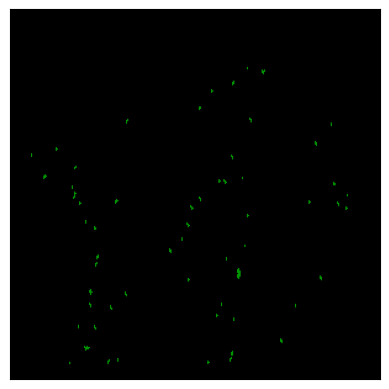

In [198]:
def minutiae_at(pixels, i, j, kernel_size):
    """
    https://airccj.org/CSCP/vol7/csit76809.pdf pg93
    Crossing number methods is a really simple way to detect ridge endings and ridge bifurcations.
    Then the crossing number algorithm will look at 3x3 pixel blocks:

    if middle pixel is black (represents ridge):
    if pixel on boundary are crossed with the ridge once, then it is a possible ridge ending
    if pixel on boundary are crossed with the ridge three times, then it is a ridge bifurcation

    :param pixels:
    :param i:
    :param j:
    :return:
    """
    # if middle pixel is black (represents ridge)
    if pixels[i][j] == 1:

        if kernel_size == 3:
            cells = [(-1, -1), (-1, 0), (-1, 1),        # p1 p2 p3
                   (0, 1),  (1, 1),  (1, 0),            # p8    p4
                  (1, -1), (0, -1), (-1, -1)]           # p7 p6 p5
        else:
            cells = [(-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2),                 # p1 p2   p3
                   (-1, 2), (0, 2),  (1, 2),  (2, 2), (2, 1), (2, 0),               # p8      p4
                  (2, -1), (2, -2), (1, -2), (0, -2), (-1, -2), (-2, -2)]           # p7 p6   p5

        values = [pixels[i + l][j + k] for k, l in cells]

        # count crossing how many times it goes from 0 to 1
        crossings = 0
        for k in range(0, len(values)-1):
            crossings += abs(values[k] - values[k + 1])
        crossings //= 2

        # if pixel on boundary are crossed with the ridge once, then it is a possible ridge ending
        # if pixel on boundary are crossed with the ridge three times, then it is a ridge bifurcation
        if crossings == 1:
            return "ending"
        if crossings == 3:
            return "bifurcation"

    return "none"


def calculate_minutiaes(im, kernel_size=3):
    biniry_image = np.zeros_like(im)
    biniry_image[im<10] = 1.0
    biniry_image = biniry_image.astype(np.int8)

    (y, x) = im.shape
    result = cv.cvtColor(im, cv.COLOR_GRAY2RGB)
    colors = {"ending" : (0, 0, 0), "bifurcation" : (0, 150, 0)}

    # iterate each pixel minutia
    for i in range(1, x - kernel_size//2):
        for j in range(1, y - kernel_size//2):
            minutiae = minutiae_at(biniry_image, j, i, kernel_size)
            if minutiae != "none":
                cv.circle(result, (i,j), radius=2, color=colors[minutiae], thickness=2)

    return result

display_image(calculate_minutiaes(binaray_test_gt_set[0]))
